In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [31]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [4]:
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X,g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [5]:
def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, '密度関数が負の値を取ります'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'確率の和が {prob_sum}　になりました'
    print(f'期待値は {E(X): .3f}')
    print(f'分散は {V(X): .3f}')

In [14]:
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]
    
    xs = np.linspace(x_min, x_max, 100)
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs], label='F(x)', ls='--', color='gray')
    
    ax.legend()
    plt.show()

In [16]:
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma ** 2) * np.exp(-(x-mu) ** 2 / (2 * sigma ** 2))
    return x_range, f

In [17]:
mu, sigma = 2, 0.5
X = N(mu, sigma)
print(X)

([-inf, inf], <function N.<locals>.f at 0x7fd7d5317510>)


In [18]:
check_prob(X)

期待値は  2.000
分散は  0.250


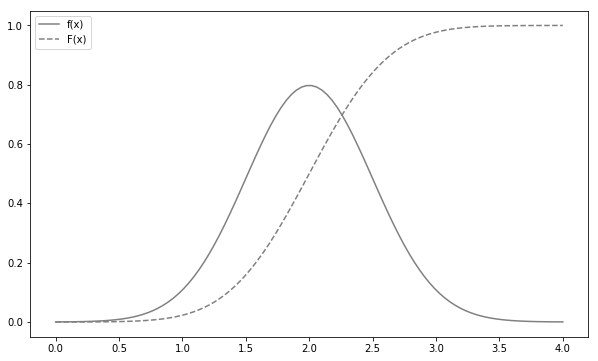

In [19]:
plot_prob(X, 0, 4)

In [20]:
rv = stats.norm(2, 0.5)

In [21]:
rv.mean(), rv.var()

(2.0, 0.25)

In [22]:
rv.pdf(2)

0.7978845608028654

In [23]:
rv.cdf(1.7)

0.27425311775007355

In [24]:
rv.isf(0.3)

2.2622002563540207

In [25]:
rv.interval(0.9)

(1.1775731865242636, 2.822426813475736)

In [26]:
rv.isf(0.95), rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

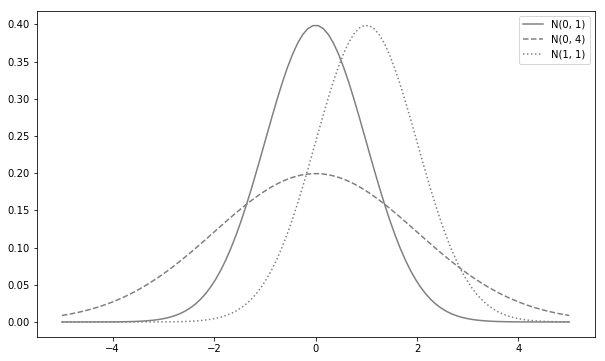

In [32]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]

for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs), label=f'N({mu}, {sigma ** 2})', ls=ls, color='gray')
    
ax.legend()

plt.show()